In this notebook, we will write our own Logistic Regression model using gradient descent. Refer to the computational graph that we discussed in class. We will create functions to:
1. Compute probability given X and the weights. Remember that we will have as many weights as there are X values (i.e., features). This is nothing but the sigmoid function.
2. Compute loss using the binary crossentropy loss function (you should know this from your Data Science course).
3. Compute gradient function to calculate the gradients or the delta weights (dw) that will be used to adjust the weights.

Once we have these 3 functions, it is very easy to create our Logistic Regression model that learns from training data using gradient descent.

Gradient descent:
Repeat:
Calaculate the output, a. a = sigmoid(z) and z = x1.w1 + x2.w2 + ....
Compute loss.
Get gradients (delta weights)
Adjust weights (weights -= weights + (learning_rate * gradients))


In [3]:
def probability(X, w):
    """
    Uses the sigmoid function to calculate probabilities.
    The function returns an array of predicted probabilities
    """
    probs = 1 / (1 + np.exp(-(np.dot(w, X.T))))
    return probs

In [4]:
def compute_loss(X, y, w):
    """
    Shape of X: m x (number of features or X values) where m is the 
    batch size
    We will iterate through all m observations and sum up the losses
    The function then returns the total loss divided by the batch size.
    That is, the loss is averaged over the batch.
    """

    loss = 0
    for i in range(X.shape[0]):
        loss += -(y[i] * np.log(probability(X[i,:], w))) - ((1 - y[i]) * np.log(1 - probability(X[i,:], w)))
    return loss / X.shape[0]

In [5]:
def compute_grad(X, y, w):
    """
    This is the function that computes gradients.
    dz = derivative of loss with respect to z = (a - y)
    dw1 = X1 . dz, dw2 = X2 . dz, and so on.
    """
    dz = probability(X,w) - y #same as (a - y)
    grads = []
    for i in range(len(w)):
        dw = np.dot(X[:, i], dz)/X.shape[0]
        grads.append(dw)
    return grads #probably better to return np.array(grads)

Let us use the breast cancer dataset from sklearn. 

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
#Let get train and test samples
from sklearn.model_selection import train_test_split
x, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [3]:
#Always a good idea to scale your data when you use gradient descent
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train)
x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

In [23]:
#This function will be used to train our model. It is in this
#function that gradient descent happens. You may have to play around with
#the epochs, batch size, and learning rate.We will initialize our weights
#to 0, something that is not recommended for Deep Learning. 
#However, it is okay for Logistic Regression

import math
import numpy as np
weights = np.zeros(x_train.shape[1])
losses = []
def train(x_train, y_train, weights, epochs = 200, batch_size = 16, lr = 0.001):
    numbers = range(x_train.shape[0])
    batches_per_iteration = math.ceil(x_train.shape[0] / batch_size)
    for i in range(epochs):
        loss = 0
        for b in range(batches_per_iteration):
            sample_list = np.random.choice(numbers, batch_size, replace = False)
            #print(sample_list)
            x_train_sample = x_train[sample_list,:]
            y_train_sample = list(y_train[sample_list])
            #print(x_train_sample.shape, y_train_sample.shape)
            loss += compute_loss(x_train_sample, y_train_sample, weights)
            weights -= (lr * np.array(
                compute_grad(x_train_sample, y_train_sample, weights)))
            #print("Loss: ", loss)
        avg_loss = loss / batches_per_iteration
        losses.append(avg_loss)
        if i % 10 == 0:
            print("Epoch: ", i, avg_loss)

In [22]:
#Let us train our model
train(x_train, y_train, weights, batch_size = 4)

Epoch:  0 0.6081764067256487
Epoch:  10 0.23677278963914125
Epoch:  20 0.16494255086425627
Epoch:  30 0.1735486765007574
Epoch:  40 0.16062565034387594
Epoch:  50 0.12213355453860236
Epoch:  60 0.13794095813126842
Epoch:  70 0.11927747569258698
Epoch:  80 0.09640591513603583
Epoch:  90 0.11667187122097149
Epoch:  100 0.12558253628990843
Epoch:  110 0.12179090527636607
Epoch:  120 0.10006316921732622
Epoch:  130 0.08825524070995491
Epoch:  140 0.0924268376308984
Epoch:  150 0.09291187835956678
Epoch:  160 0.1028427648420114
Epoch:  170 0.09036121950443474
Epoch:  180 0.08801936475491254
Epoch:  190 0.08827876513313215


In [12]:
probs = probability(x_test, weights) #Get the probabilties for the test cases
results = np.where(probs >= 0.5, 1, 0) #convert them to 0s and 1s
results[:5] #take a look at the first five

array([1, 0, 0, 1, 1])

In [13]:
weights

array([-0.49242157, -0.55251132, -0.48233869, -0.57043132, -0.16797021,
        0.03726538, -0.53359057, -0.66146946, -0.05997868,  0.1972913 ,
       -0.73387435, -0.00907677, -0.55294051, -0.64070556, -0.13198965,
        0.39541282,  0.14778086,  0.02203011,  0.12122202,  0.35233038,
       -0.71419994, -0.76624066, -0.64865598, -0.75165812, -0.56068203,
       -0.18289979, -0.50896227, -0.58372268, -0.60055223, -0.16502511])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



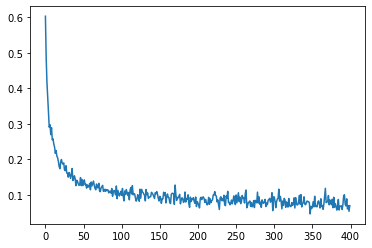

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(losses)), losses)
plt.show()

Your turn! Try the model on the Pima Indian diabetes dataset given below:

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

How did the model do? Compare the performance of your model with sklearn's implementation of Logistic Regression. Try other models (e.g., Ensembles) as well.